<a href="https://colab.research.google.com/github/karthickrajas/Econometrics/blob/master/M3_AST_26_Deep_Reinforcement_Learning_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 26: Deep Reinforcement Learning

## Learning Objectives

At the end of the experiment, you will be able to :

* setup the OpenAI Gym environment
* create simple and neural network policies for cart-pole environment
* implement policy gradients to solve cart-pole environment


### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "ADL_test" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9876543345" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "M3_AST_26_Deep_Reinforcement_Learning_C" #name of the notebook

def setup():
    ipython.magic("sx pip install gym==0.19.0 pyvirtualdisplay > /dev/null 2>&1")
    ipython.magic("sx apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1")
    ipython.magic("sx pip install gym[all]")   
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Information

### Reinforcement Learning (RL)

<center>
<img src="https://docs.aws.amazon.com/deepracer/latest/developerguide/images/deepracer-reinforcement-learning-overview.png" width=500px/>
</center>
<br><br>

In Reinforcement Learning, a software **agent** makes observations (**states**) and takes **actions** within an **environment**, and in return it receives **rewards**. Its objective is to learn to act in a way that will maximize its expected rewards over time. We can think of positive rewards as pleasure and negative rewards as pain. In short, the agent acts in the environment and learns by trial and error to maximize its pleasure and minimize its pain.


### Introduction to OpenAI Gym

One of the challenges of Reinforcement Learning is that in order to train an agent, we first need to have a working environment. If we want to program an agent that will learn to play an Atari game, we will need an Atari game simulator. 

**OpenAI Gym** is a toolkit that provides a wide variety of simulated environments (Atari games, board games, 2D and 3D physical simulations, and so on), so we can train agents, compare them, or develop new RL algorithms.

**Create a CartPole environment**

<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Cart_pole.JPG" width=400px/>
</center>
<br><br>

It is a 2D simulation in which a pole is attached to a cart placed on a frictionless track. The agent has to apply force to move the cart left or right as shown in the figure above. **It is rewarded for every time step the pole remains upright**. The agent, therefore, must learn to keep the pole from falling over.

### Import required packages

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
mpl.rc('animation', html='jshtml')
from pyvirtualdisplay import Display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

We can get the list of all available environments by running the below code cell:

In [ ]:
# List all the available environments
gym.envs.registry.all()

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v1), EnvSpec(FrozenLake8x8-v1), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

An environment can be created using `make()` function. After the environment is created, we must initialize it using the `reset()` method. This returns the first observation. Observations depend on the type of environment.

The Cart-Pole is a very simple environment composed of a cart that can move left or right, and pole placed vertically on top of it. The agent must move the cart left or right to keep the pole upright.

In [ ]:
# Create cartpole environment
env = gym.make("CartPole-v1")

# Let's initialize the environment by calling reset() method. This returns an observation:
obs = env.reset()
obs

array([ 0.02226467,  0.020066  , -0.02514408,  0.02206036])

For the CartPole environment, each observation is a 1D NumPy array containing four floats as shown in the figure below.
<br><br>
<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/Cartpole_image.JPG" width=400px/>
</center>

These floats represent:

* the cart’s horizontal position (0.0 = center), 
* its velocity (positive means right), 
* the angle of the pole (0.0 = vertical), and 
* its angular velocity (positive means clockwise).

Now let’s display this environment and can be visualized by calling its `render()` method. If we want `render()` to return the rendered image as a NumPy array, we can set `mode="rgb_array"` and visualize that array:

In [ ]:
!pip install pyglet==1.5.27

In [ ]:
display = Display(visible=0, size=(1400, 900)).start()

# In this example we will set mode="rgb_array" to get an image of the environment as a NumPy array
img = env.render(mode="rgb_array")

print(img.shape) # height, width, channels (3 = Red, Green, Blue)

(400, 600, 3)


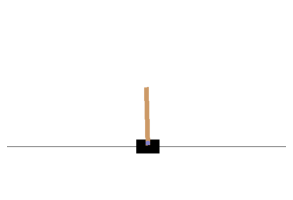

In [ ]:
# Create a function to plot environment
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

plot_environment(env)
plt.show()

Let's see how to interact with an environment. Your agent will need to select an action from an "action space" (the set of possible actions). Let's see what this environment's action space looks like:

In [ ]:
# Actions possible
env.action_space

Discrete(2)

Yes, just two possible actions

Discrete(2) means that the possible actions are integers 0 and 1, which represent accelerating left (0) or right (1). Other environments may have additional discrete actions, or other kinds of actions (e.g., continuous). Since the pole is leaning toward the right (obs[2] > 0), let’s accelerate the cart toward the right.

Now we are ready to play the game. We use a simple random agent.

In [ ]:
# Play the game with random agent
env = gym.make("CartPole-v1")
obs = env.reset()
print("Action space: ", env.action_space)
frames = []

while True:
    img = env.render(mode="rgb_array")
    frames.append(img)
    # Agent goes here
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action) 
    if done:
        break

Action space:  Discrete(2)


In the above code cell,

* **env.render()**: is used to display the environment image

* **env.action_space**: gives the possible actions, here Discrete(2) means integers 0 and 1, which represent accelerating left (0) or right (1)

* **.sample()**: is used to choose an action either 0 or 1 randomly

* **env.step(action)**: executes the given action and returns four values:
    
    * **observation**: This is the new observation. 

    * **reward**: In this environment, we get a reward of 1.0 at every step, no matter what we do, so the goal is to keep the episode running as long as possible.
    
    * **done**: This value will be True when the episode is over. This will happen when the pole tilts too much, or goes off the screen, or after 200 steps (in this last case, we have won). After that, the environment must be reset before it can be used again.

    * **info**: This environment-specific dictionary can provide some extra information that we may find useful for debugging or for training. For example, in some games it may indicate how many lives the agent has.

Let's visualize the animation of this simple random agent.

In [ ]:
# Create functions to plot animation
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(fig, update_scene, fargs=(frames, patch),
                                   frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [ ]:
# Visualize animation
plot_animation(frames)

From the above animation, we can see that the random agent keeps the pole up for few timesteps then it falls.

### Policy Search

The algorithm, a software agent uses to determine its actions is called its **policy**. A policy is an agent's strategy.

For example, imagine a world where a robot moves across the room and the task is to get to the target point `(x, y)`, where it gets a reward. Here:

*   A room is an `environment`
*   Robot's current position is a `state`
*   A `policy` is what an agent does to accomplish this task:

    * dumb robots just wander around randomly until they accidentally end 
up in the right place (policy #1)

    * others may, for some reason, learn to go along the walls most of the route (policy #2)

    * smart robots plan the route in their "head" and go straight to the goal (policy #3)

Obviously, some policies are better than others, and there are multiple ways to assess them, namely state-value function and action-value function. The goal of RL is to learn the best policy. A policy defines the learning agent's way of behaving at a given time.


The policy could be a neural network taking observations as inputs and giving an output in terms of the action to take.

The policy can be any algorithm you can think of, and it does not have to be `deter‐ministic`. In fact, in some cases it does not even have to observe the environment! For example, consider a robotic vacuum cleaner whose reward is the amount of dust it picks up in 30 minutes. Its policy could be to move forward with some probability `p` every second, or randomly rotate left or right with probability `1 – p`. The rotation angle would be a random angle between –r and +r. Since this policy involves some randomness, it is called a `stochastic policy`. The robot will have an erratic trajectory, which guarantees that it will eventually get to any place it can reach and pick up all the dust. The question is, how much dust will it pick up in 30 minutes?


How would you train such a robot? There are just two policy parameters
you can tweak: the probability `p` and the angle range `r`. One possible learning algorithm could be to try out many different values for these parameters, and pick the combination that performs best. This is an example of **policy search**, in this case using a brute force approach. When the
policy space is too large (which is generally the case), finding a good set of parameters this way is like searching for a needle in a gigantic haystack.

Now we will solve the cart pole environment using different methods including:

* **Simple Hard-coded policy:** Take the action of accelerating the cart left when the pole is leaning toward the left and accelerating it right when the pole is leaning toward the right.

* **Neural Network Policy:** Use a neural network which takes an observation as input and outputs the probability of action to be executed. Then we select an action randomly according to the estimated probabilities.

* **Policy gradients:** In Policy gradient methods, the process of action selection at every step is stochastic. It is based on the probability of
selection of a particular action in each state. This can be useful in many applications where determining the accurate value function is complex. In case of cart-pole balancing problem, one such example is the upright state, where the pole is in the upright position but the agent must take either action defined by the objective. In this context, the agent may not prefer a deterministic action as it may limit the exploration across the state space.


To know more about RL algorithms applied to the Cart-Pole environment, click [here](http://azadproject.ir/wp-content/uploads/2014/07/2017-Comparison-of-Reinforcement-Learning-Algorithms-applied-to-the-Cart-Pole-Problem.pdf).

**Simple Hard-coded Policy**

Let’s hardcode a simple policy that accelerates left when the pole is leaning toward the left and accelerates right when the pole is leaning toward the right. We will run this policy to see the average rewards (time steps for which the pole remains upright) it gets over 500 episodes:

In [ ]:
# Create environment
env = gym.make("CartPole-v1")

# Create a simple policy function
def basic_policy(obs):
    ''' Returns 0 (move cart left) if angle < 0 (pole leaning left) else 1 '''
    angle = obs[2]
    return 0 if angle < 0 else 1

# Run the simple policy for 500 episodes
totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

In [ ]:
# Statistics of the total rewards from 500 episodes
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(42.522, 8.755427802226457, 24.0, 67.0)

 

From the above results, we can see that for simple hardcoded policy even with 500 tries, this policy never managed to keep the pole upright for more than 71 consecutive steps. This environment is considered solved when the agent keeps the poll up for 200 steps.

Let's visualize one episode:

In [ ]:
# Visualize one episode with basic policy

env = gym.make("CartPole-v1")
obs = env.reset()
frames = []

for step in range(200):
    img = env.render(mode="rgb_array")
    frames.append(img)
    # action based on simple policy
    action = basic_policy(obs)
    obs, reward, done, info = env.step(action)
    if done:
        break

# Visualize animation
plot_animation(frames)

If we look at the simulation above, we will see that the cart oscillates left and right more and more strongly until the pole tilts too much.

Let’s see if we can use neural networks to come up with a better policy.

**Neural Network Policies**

<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/Neural_network_policy.JPG" width=600px/>
</center>
<br><br>

As shown in the above figure, the neural network will take an observation as input, and it will output the action to be executed. More precisely, it will estimate a probability for each action, and then we will select an action randomly, according to the estimated probabilities. 

In the case of the CartPole environment, there are just two possible actions (left or right), so we only need one output neuron. It will output the probability $p$ of action $0$ (left), and the probability of action $1$ (right) will be $1 – p$. 

We are picking a random action based on the probabilities given by the neural network, rather than just picking the action with the highest score because this approach lets the agent find the right balance between ***exploring*** new actions and ***exploiting*** the actions that are known to work well.

Let's build the neural network policy:

In [ ]:
# Create model
n_inputs = 4 # == env.observation_space.shape[0]
model = Sequential([
                    Dense(5, activation="relu", input_shape=[n_inputs]),
                    Dense(1, activation="sigmoid")
                    ])

The number of inputs is the size of the observation space, and we have five hidden units. Finally, we want to output a single probability, so we have a single output neuron using the sigmoid activation function.

Let's write a small function that will run the model to play one episode, and return the frames so we can display an animation:

In [ ]:
# Create function to return frames for animation
def render_policy_net(model, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("CartPole-v1")
    env.seed(seed)
    np.random.seed(seed)
    obs = env.reset()
    for step in range(n_max_steps):
        img = env.render(mode="rgb_array")
        frames.append(img)
        left_proba = model.predict(obs.reshape(1, -1))
        action = int(np.random.rand() > left_proba)
        obs, reward, done, info = env.step(action)
        if done:
            break
    env.close()
    return frames

Now let's look at how well this randomly initialized policy network performs:

In [ ]:
# Visualize animation
frames = render_policy_net(model)
plot_animation(frames)

1/1 [==============================] - 0s 21ms/step


We can see it performs pretty bad. The neural network will have to learn to do better. First, let's see if it is capable of learning the basic policy we used earlier: go left if the pole is tilting left, and go right if it is tilting right.

We can make the same network play in 50 different environments in parallel (this will give us a diverse training batch at each step), and train for 5000 iterations. We also reset environments when they are done. We train the model using a custom training loop so we can easily use the predictions at each training step to advance the environments.

In [ ]:
# Play in 50 different environments
n_environments = 50
n_iterations = 5000

envs = [gym.make("CartPole-v1") for _ in range(n_environments)]
for index, env in enumerate(envs):
    env.seed(index)
np.random.seed(42)
observations = [env.reset() for env in envs]
optimizer = keras.optimizers.RMSprop()
loss_fn = keras.losses.binary_crossentropy

for iteration in range(n_iterations):
    # if angle < 0, we want proba(left) = 1., or else proba(left) = 0.
    target_probas = np.array([([1.] if obs[2] < 0 else [0.])
                              for obs in observations])
    with tf.GradientTape() as tape:
        left_probas = model(np.array(observations))
        loss = tf.reduce_mean(loss_fn(target_probas, left_probas))
    print("\rIteration: {}, Loss: {:.3f}".format(iteration, loss.numpy()), end="")
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    actions = (np.random.rand(n_environments, 1) > left_probas.numpy()).astype(np.int32)
    for env_index, env in enumerate(envs):
        obs, reward, done, info = env.step(actions[env_index][0])
        observations[env_index] = obs if not done else env.reset()

for env in envs:
    env.close()

Iteration: 4999, Loss: 0.100

In [ ]:
# Visualize animation
frames = render_policy_net(model)
plot_animation(frames)

1/1 [==============================] - 0s 19ms/step


From above it seems like it learned the policy correctly. Now let's see if it can learn a better policy on its own. One that does not wobble as much.

**Policy Gradients with Neural Network (Optional)**

To train the neural network we will need to define the target probabilities. If an action is good we should increase its probability, and conversely if it is bad we should reduce it. To know whether an action is good or bad, the problem is most actions have delayed effects, so when we win or lose points in an episode, it is not clear which actions contributed to this result. This is called the ***credit assignment problem***.

The _Policy Gradients_ algorithm tackles this problem by first playing multiple episodes, then making the actions in good episodes slightly more likely, while actions in bad episodes are made slightly less likely.

In other words, PG algorithms optimize the parameters of a policy by following the gradients toward higher rewards. One popular class of PG algorithms, called REINFORCE algorithms, was introduced in 1992 by Ronald Williams. Here is one common variant:

1. First, let the neural network policy play the game several times, and at each step, compute the gradients that would make the chosen action even more likely-but don’t apply these gradients yet.

2. Once we have run several episodes, compute each action’s advantage.

3. If an action’s advantage is positive, it means that the action was probably good, and we want to apply the gradients computed earlier to make the action even more likely to be chosen in the future. However, if the action’s advantage is negative, it means the action was probably bad, and we want to apply the opposite gradients to make this action slightly less likely in the future. The solution is simply to multiply each gradient vector by the corresponding action’s advantage.

4. Finally, compute the mean of all the resulting gradient vectors, and use it to perform a Gradient Descent step.

Let’s implement this algorithm. We will train the neural network policy we built earlier so that it learns to balance the pole on the cart. 

First, we need a function that will play one step. We will pretend for now that whatever action it takes is the right one so that we can compute the loss and its gradients (these gradients will just be saved for a while, and we will modify them later depending on how good or bad the action turned out to be):

In [ ]:
# Function explanation is given below
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        action = (tf.random.uniform([1, 1]) > left_proba)
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))
    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, info = env.step(int(action[0, 0].numpy()))
    return obs, reward, done, grads

Let’s walk through this function:

* Within the GradientTape block, we start by calling the model,
giving it a single observation (we reshape the observation so it becomes a batch
containing a single instance, as the model expects a batch). This outputs the
probability of going left.

* Next, we sample a random float between 0 and 1, and we check whether it is
greater than left_proba. The action will be False with probability left_proba,
or True with probability 1 - left_proba. Once we cast this Boolean to a number, the action will be 0 (left) or 1 (right) with the appropriate probabilities.

* Next, we define the target probability of going left: it is 1 minus the action (cast
to a float). If the action is 0 (left), then the target probability of going left will be 1. If the action is 1 (right), then the target probability will be 0.

* Then we compute the loss using the given loss function, and we use the tape to
compute the gradient of the loss with regard to the model’s trainable variables.
Again, these gradients will be tweaked later, before we apply them, depending on
how good or bad the action turned out to be.

* Finally, we play the selected action, and we return the new observation, the
reward, whether the episode is ended or not, and the gradients that we
just computed.

Now let’s create another function that will rely on the `play_one_step()` function to play multiple episodes, returning all the rewards and gradients for each episode and each step:

In [ ]:
# Create play multiple episodes function
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, grads = play_one_step(env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

This code returns a list of reward lists (one reward list per episode, containing one reward per step), as well as a list of gradient lists (one gradient list per episode, each containing one tuple of gradients per step and each tuple containing one gradient tensor per trainable variable).

The algorithm will use the `play_multiple_episodes()` function to play the game
several times (e.g., 10 times), then it will go back and look at all the rewards, discount them, and normalize them. To do that, we need a couple more functions: 

* the first will compute the sum of future discounted rewards at each step, and 

* the second will normalize all these discounted rewards (returns) across many episodes

The **discount factor** essentially determines how much the reinforcement learning agents cares about rewards in the distant future relative to those in the immediate future. If $\gamma = 0$, the agent will be completely myopic and only learn about actions that produce an immediate reward. If $\gamma = 1$, the agent will evaluate each of its actions based on the sum total of all of its future rewards.

To know more about the discount factor in RL, click [here](https://towardsdatascience.com/penalizing-the-discount-factor-in-reinforcement-learning-d672e3a38ffe).

In [ ]:
# Create functions to sum and normalize rewards
def discount_rewards(rewards, discount_rate):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_rate
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

Let’s check that this works:

<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/actions_return_.JPG" width=450px/>
</center>

Say there were 3 actions, and after each action there was a reward: first 10, then 0, then -50 as shown in the figure above. If we use a discount factor of 80%, then the 3rd action will get -50 (full credit for the last reward), but the 2nd action will only get -40 (80% credit for the last reward), and the 1st action will get 80% of -40 (-32) plus full credit for the first reward (+10), which leads to a discounted reward of -22:

In [ ]:
# Compute discounted rewards
discount_rewards(rewards = [10, 0, -50], discount_rate = 0.8)

array([-22, -40, -50])

In [ ]:
# Normalize discounted all rewards
discount_and_normalize_rewards(all_rewards = [[10, 0, -50], [10, 20]], discount_rate = 0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

The call to `discount_rewards()` returns exactly what we expect.
We can verify that the function `discount_and_normalize_rewards()` does indeed
return the normalized action advantages for each action in both episodes. Notice that the first episode was much worse than the second, so its normalized advantages are all negative; all actions from the first episode would be considered bad, and conversely all actions from the second episode would be considered good.

Now let’s define the hyperparameters to run the algorithm. We will run 150 training iterations, playing 10 episodes per iteration, and each episode will last at most 200 steps. We will use a discount factor of 0.95:

In [ ]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_rate = 0.95

We also need an optimizer and the loss function. We will use the binary cross-entropy loss function because we are training a binary classifier (there are two possible actions: left or right):

In [ ]:
# Create optimizer and loss function
optimizer = keras.optimizers.Adam(learning_rate=0.01)
loss_fn = keras.losses.binary_crossentropy

Let's build and run the training loop.

In [ ]:
# Run training loop
env = gym.make("CartPole-v1")
env.seed(42);

for iteration in range(n_iterations):
    # Play multiple episodes
    all_rewards, all_grads = play_multiple_episodes(env, n_episodes_per_update, n_max_steps, model, loss_fn)
    total_rewards = sum(map(sum, all_rewards))                     
    print("\rIteration: {}, mean rewards: {:.1f}".format(iteration, total_rewards / n_episodes_per_update), end="")
    # Normalize discounted rewards 
    all_final_rewards = discount_and_normalize_rewards(all_rewards, discount_rate)
    all_mean_grads = []
    # Compute weighted mean of gradients for every trainable variable
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean([final_reward * all_grads[episode_index][step][var_index]
                                     for episode_index, final_rewards in enumerate(all_final_rewards)
                                     for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)
    # Apply gradients
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

env.close()

Iteration: 149, mean rewards: 200.0

Let’s walk through this code:

* At each training iteration, this loop calls the `play_multiple_episodes()` function, which plays the game 10 times and returns all the rewards and gradients for every episode and step.

* Then we call the `discount_and_normalize_rewards()` to compute each action’s
normalized advantage. This provides a measure of how good or bad each action actually was, in hindsight.

* Next, we go through each trainable variable, and for each of them we compute
the weighted mean of the gradients for that variable over all episodes and all
steps, weighted by the `final_reward`.

* Finally, we apply these mean gradients using the optimizer: the model’s trainable variables will be tweaked, and hopefully the policy will be a bit better. 

This code will train the neural network policy, and it will successfully learn to balance the pole on the cart. The mean reward per episode will get very close to 200 which represents success.

In [ ]:
# Visualize PG algorithm animation
frames = render_policy_net(model)
plot_animation(frames)

1/1 [==============================] - 0s 19ms/step


### Please answer the questions below to complete the experiment:




In [ ]:
#@title Q1. Which of the following is correct about Reinforcement Learning ? 
Answer1 = "" #@param ["", "The agent makes an action in an environment and is given back a new observation and a reward for that action", "The agent makes an observation in an environment and is given back a new action and a reward for that observation", "The agent is given a new environment whenever it receives a reward for its action"]

#### Consider the following statements and answer Q2.

A. A policy is a mapping from perceived states of the environment to actions to be taken when in those states.

B. The value of a state is the total amount of reward an agent can expect to accumulate over the future, starting from that state.

C. A model of the environment allows inferences to be made about how the environment will behave. For example, given a state and action, the model might predict the resultant next state and next reward.


In [ ]:
#@title Q.2. Which of the following statements is/are True for a Reinforcement Learning Agent ?
Answer2 = "" #@param ["","Only A", "Only C", "Both A and B","Both B and C",  "A, B and C"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first..")
except NameError:
  print ("Please complete the setup first.")